In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('predict_cl.csv', sep=",", thousands=',')
df.head()

,Unnamed: 0,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct,Class
0,0,"BABYFOOD,CRL,OATMEAL,W/BANANAS,DRY",47.0,393,12,6,39.0,734,52.0,1375.0,...,1267.0,1429.0,2186.0,0.0,2.0,1 tbsp,15.0,.5 oz,0.0,5
1,1,"HEARTS OF PALM,CANNED",902.0,28,252,62,204.0,462,24.0,NaN,...,13.0,103.0,202.0,0.0,146.0,1 cup,33.0,1 piece,0.0,5
2,2,"CHICKEN,BROILERS OR FRYERS,THIGH,MEAT ONLY,CKD...",6389.0,196,2406,1109,156.0,0,0.0,0.0,...,2866.0,4878.0,1673.0,130.0,89.0,1 thigh,85.0,"1 serving, (3 oz)",29.0,4
3,3,"PORK,CURED,SHLDR,ARM PICNIC,LN&FAT,RSTD",5473.0,280,2043,2135,351.0,0,0.0,0.0,...,767.0,1014.0,232.0,58.0,140.0,1 cup,85.0,3 oz,27.0,4
4,4,"VINEGAR,DISTILLED",9478.0,18,0,0,2.0,4,0.0,4.0,...,0.0,0.0,0.0,0.0,14.0,1 tbsp,238.0,1 cup,0.0,2


In [3]:
del df['Unnamed: 0']
df.head()

,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),...,FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct,Class
0,"BABYFOOD,CRL,OATMEAL,W/BANANAS,DRY",47.0,393,12,6,39.0,734,52.0,1375.0,651.0,...,1267.0,1429.0,2186.0,0.0,2.0,1 tbsp,15.0,.5 oz,0.0,5
1,"HEARTS OF PALM,CANNED",902.0,28,252,62,204.0,462,24.0,NaN,58.0,...,13.0,103.0,202.0,0.0,146.0,1 cup,33.0,1 piece,0.0,5
2,"CHICKEN,BROILERS OR FRYERS,THIGH,MEAT ONLY,CKD...",6389.0,196,2406,1109,156.0,0,0.0,0.0,13.0,...,2866.0,4878.0,1673.0,130.0,89.0,1 thigh,85.0,"1 serving, (3 oz)",29.0,4
3,"PORK,CURED,SHLDR,ARM PICNIC,LN&FAT,RSTD",5473.0,280,2043,2135,351.0,0,0.0,0.0,10.0,...,767.0,1014.0,232.0,58.0,140.0,1 cup,85.0,3 oz,27.0,4
4,"VINEGAR,DISTILLED",9478.0,18,0,0,2.0,4,0.0,4.0,6.0,...,0.0,0.0,0.0,0.0,14.0,1 tbsp,238.0,1 cup,0.0,2


In [4]:
dfc = pd.DataFrame(df, columns=['Shrt_Desc', 'Protein_(g)', 'Carbohydrt_(g)', 'Lipid_Tot_(g)', 'Class'])
# dfc = pd.DataFrame(df[df['Class'] != 6], columns=['Shrt_Desc', 'Class'])

In [5]:
dfc.head()

,Shrt_Desc,Protein_(g),Carbohydrt_(g),Lipid_Tot_(g),Class
0,"BABYFOOD,CRL,OATMEAL,W/BANANAS,DRY",12,734,6,5
1,"HEARTS OF PALM,CANNED",252,462,62,5
2,"CHICKEN,BROILERS OR FRYERS,THIGH,MEAT ONLY,CKD...",2406,0,1109,4
3,"PORK,CURED,SHLDR,ARM PICNIC,LN&FAT,RSTD",2043,0,2135,4
4,"VINEGAR,DISTILLED",0,4,0,2


In [6]:
dfc.isnull().values.any()

False

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression as log_reg, LinearRegression as lr_reg
from sklearn.ensemble import RandomForestClassifier as rf, RandomForestRegressor as rf_reg
from sklearn.ensemble import GradientBoostingClassifier as gb, GradientBoostingRegressor as gb_reg

import sklearn.cluster as cluster

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import time
%matplotlib notebook
import warnings
warnings.filterwarnings("ignore")

In [8]:
dfc[['Protein_(g)', 'Carbohydrt_(g)', 'Lipid_Tot_(g)', 'Class']] = dfc[['Protein_(g)', 'Carbohydrt_(g)', 'Lipid_Tot_(g)', 'Class']].apply(pd.to_numeric)

In [9]:
# 'Shrt_Desc', 'Protein_(g)', 'Carbohydrt_(g)', 'Lipid_Tot_(g)', 'Class'
X = dfc[['Protein_(g)', 'Carbohydrt_(g)', 'Lipid_Tot_(g)']]
y = dfc['Class']
X.head()

,Protein_(g),Carbohydrt_(g),Lipid_Tot_(g)
0,12,734,6
1,252,462,62
2,2406,0,1109
3,2043,0,2135
4,0,4,0


In [10]:
corr = X.corr()
corr

,Protein_(g),Carbohydrt_(g),Lipid_Tot_(g)
Protein_(g),1.000000,-0.151751,0.254425
Carbohydrt_(g),-0.151751,1.000000,0.003179
Lipid_Tot_(g),0.254425,0.003179,1.000000


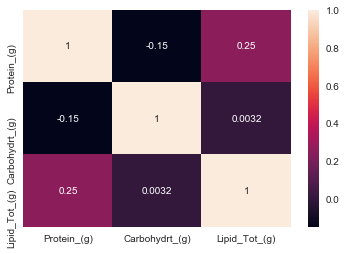

In [11]:
corr = X.corr()
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

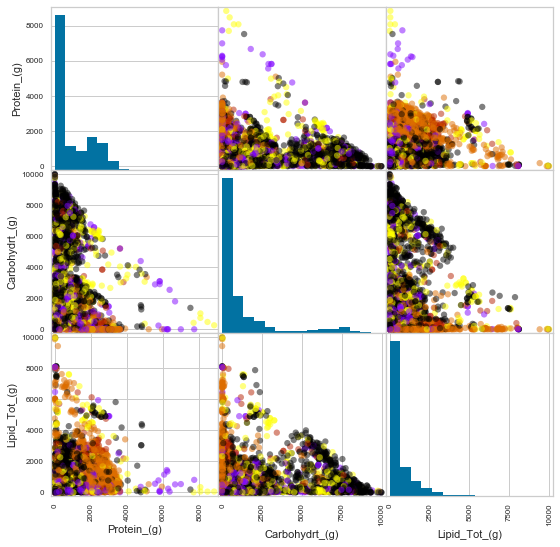

In [12]:
cmap = plt.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20,random_state = 0)

In [14]:
random_forest = rf()

In [15]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
y_pred=random_forest.predict(X_test)

In [17]:
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred, average='weighted'))
print(precision_score(y_test,y_pred, average='weighted'))
print(recall_score(y_test,y_pred, average='weighted'))

0.65
0.6356060606060605
0.645
0.65


In [18]:
grad_boost=gb()

In [19]:
grad_boost.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [20]:
y_pred=grad_boost.predict(X_test)

In [21]:
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred, average='weighted'))
print(precision_score(y_test,y_pred, average='weighted'))
print(recall_score(y_test,y_pred, average='weighted'))

0.7
0.6845238095238095
0.7952380952380953
0.7


In [22]:
grad_boost_reg=gb_reg()

In [23]:
grad_boost_reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [26]:
y_pred=grad_boost_reg.predict(X_test)

In [39]:
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

1.869845527492749
1.140362379624749
0.23990019207611835


## Распределение размеченных данных

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

import re
from pymystem3 import Mystem
import numpy as np
import itertools
%matplotlib inline

from nltk.stem.snowball import RussianStemmer
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import *

In [111]:
m = Mystem()
regex = re.compile("[A-Za-z]+")

def words_only(text, regex=regex):
    try:
        return " ".join(regex.findall(text))
    except:
        return ""

from class_creator.class_creator import classPredictor

cpr = classPredictor('./class_creator/df1.txt', './class_creator/df2.txt', './class_creator/df3.txt', './class_creator/df4.txt', './class_creator/df5.txt')
stopwords = cpr.loadStopWords() 
stopwords 
def remove_stopwords(text, mystopwords=stopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""

def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "

def low(text):
    return text.lower()

def stemming(text, stemmer = RussianStemmer()):
    try:
        return " ".join([stemmer.stem(w) for w in text.split()])
    except:
        return " "



In [112]:
df["Class"] = pd.to_numeric(df["Class"])
data = pd.DataFrame(df, columns=['Shrt_Desc', 'Class'])


data['Class'].value_counts()

1    2609
4    1786
5    1391
2    1257
3     202
Name: Class, dtype: int64

In [113]:
data.Shrt_Desc = data.Shrt_Desc.apply(low)
data.Shrt_Desc = data.Shrt_Desc.apply(words_only)
data.Shrt_Desc = data.Shrt_Desc.apply(words_only)
data.Shrt_Desc = data.Shrt_Desc.apply(remove_stopwords)

In [114]:
vectors = TfidfVectorizer().fit_transform(data.Shrt_Desc)
X_reduced = TruncatedSVD(n_components=5, random_state=0).fit_transform(vectors)
X_embedded = TSNE(n_components=2, perplexity=5, verbose=0).fit_transform(X_reduced)

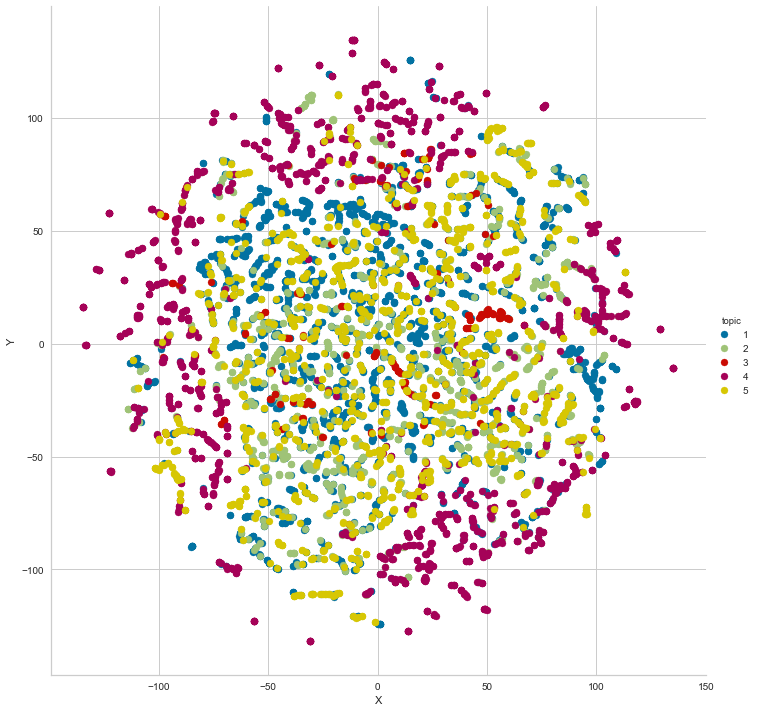

In [115]:
vis_df = pd.DataFrame({'X': X_embedded[:, 0], 'Y': X_embedded[:, 1], 'topic' : data['Class']})
sns.FacetGrid(vis_df, hue="topic", size=10).map(plt.scatter, "X", "Y").add_legend()

# Классификация текстов

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import random
random.seed(1228)
from sklearn.feature_extraction.text import *
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
import re
from pymystem3 import Mystem
import numpy as np
import itertools
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from nltk.stem.snowball import RussianStemmer
import seaborn as sns


In [41]:
m = Mystem()
regex = re.compile("[A-Za-z]+")

def words_only(text, regex=regex):
    try:
        return " ".join(regex.findall(text))
    except:
        return ""

from class_creator.class_creator import classPredictor

cpr = classPredictor('./class_creator/df1.txt', './class_creator/df2.txt', './class_creator/df3.txt', './class_creator/df4.txt', './class_creator/df5.txt')
stopwords = cpr.loadStopWords() 
stopwords 
def remove_stopwords(text, mystopwords=stopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""

def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "

def low(text):
    return text.lower()

def stemming(text, stemmer = RussianStemmer()):
    try:
        return " ".join([stemmer.stem(w) for w in text.split()])
    except:
        return " "



## Preprocessing with lemmatize

In [71]:
df["Class"] = pd.to_numeric(df["Class"])
data = pd.DataFrame(df, columns=['Shrt_Desc', 'Class'])


data['Class'].value_counts()

1    2609
4    1786
5    1391
2    1257
3     202
Name: Class, dtype: int64

In [72]:
data.head()

,Shrt_Desc,Class
0,"BABYFOOD,CRL,OATMEAL,W/BANANAS,DRY",5
1,"HEARTS OF PALM,CANNED",5
2,"CHICKEN,BROILERS OR FRYERS,THIGH,MEAT ONLY,CKD...",4
3,"PORK,CURED,SHLDR,ARM PICNIC,LN&FAT,RSTD",4
4,"VINEGAR,DISTILLED",2


In [73]:
corpus_sample_train = pd.DataFrame(columns=data.columns)
corpus_sample_test = pd.DataFrame(columns=data.columns)

for cl in data['Class'].unique():
    corpus_sample = data[data['Class']==cl]
    c = int(0.8*len(corpus_sample))
    corpus_sample_train = corpus_sample_train.append(corpus_sample.iloc[:c,:])
    corpus_sample_test = corpus_sample_test.append(corpus_sample.iloc[c + 1:,:])

In [74]:
len(corpus_sample_train)

5793

In [46]:
len(corpus_sample_test)

1447

In [47]:
corpus_sample_train.Shrt_Desc = corpus_sample_train.Shrt_Desc.apply(low)
corpus_sample_test.Shrt_Desc = corpus_sample_test.Shrt_Desc.apply(low)
corpus_sample_train.Shrt_Desc = corpus_sample_train.Shrt_Desc.apply(words_only)
corpus_sample_test.Shrt_Desc = corpus_sample_test.Shrt_Desc.apply(words_only)
corpus_sample_train.Shrt_Desc = corpus_sample_train.Shrt_Desc.apply(remove_stopwords)
corpus_sample_test.Shrt_Desc = corpus_sample_test.Shrt_Desc.apply(remove_stopwords)
corpus_sample_train.Shrt_Desc = corpus_sample_train.Shrt_Desc.apply(lemmatize)
corpus_sample_test.Shrt_Desc = corpus_sample_test.Shrt_Desc.apply(lemmatize)

print(corpus_sample_train['Class'].value_counts())
corpus_sample_test.head()


1    2087
4    1428
5    1112
2    1005
3     161
Name: Class, dtype: int64


,Shrt_Desc,Class
5791,oil industrial soy part hydr non dairy butter ...,5
5803,lamb nz imp netted rolled slow,5
5817,tofu yogurt,5
5819,tofu firm prep nigari,5
5823,onion powder,5


## VotingClassifier

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
Random Forest
Precision:   0.83
Recall:   0.84
F1-measure:   0.83
Accuracy:   0.85
              precision    recall  f1-score   support

           1       0.84      0.90      0.87       521
           2       0.84      0.78      0.81       251
           3       0.76      0.85      0.80        40
           4       0.92      0.95      0.94       357
           5       0.80      0.70      0.75       278

   micro avg       0.85      0.85      0.85      1447
   macro avg       0.83      0.84      0.83      1447
weighted avg       0.85      0.85      0.85      1447



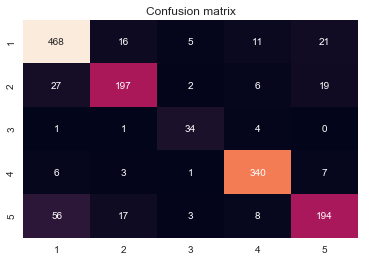

Random Forest params
Precision:   0.84
Recall:   0.85
F1-measure:   0.84
Accuracy:   0.85
              precision    recall  f1-score   support

           1       0.83      0.89      0.86       521
           2       0.88      0.76      0.82       251
           3       0.78      0.90      0.84        40
           4       0.93      0.95      0.94       357
           5       0.77      0.73      0.75       278

   micro avg       0.85      0.85      0.85      1447
   macro avg       0.84      0.85      0.84      1447
weighted avg       0.85      0.85      0.85      1447



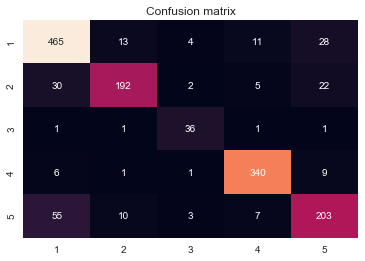

Bagging
Precision:   0.82
Recall:   0.86
F1-measure:   0.84
Accuracy:   0.85
              precision    recall  f1-score   support

           1       0.87      0.88      0.87       521
           2       0.83      0.79      0.81       251
           3       0.73      0.93      0.81        40
           4       0.94      0.93      0.94       357
           5       0.76      0.76      0.76       278

   micro avg       0.85      0.85      0.85      1447
   macro avg       0.82      0.86      0.84      1447
weighted avg       0.85      0.85      0.85      1447



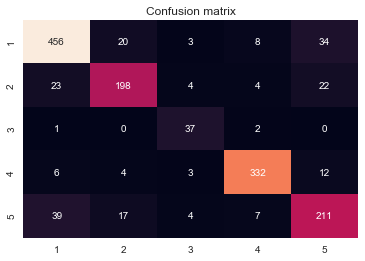

Bagging params
Precision:   0.78
Recall:   0.68
F1-measure:   0.71
Accuracy:   0.75
              precision    recall  f1-score   support

           1       0.70      0.88      0.78       521
           2       0.81      0.57      0.67       251
           3       0.85      0.55      0.67        40
           4       0.81      0.92      0.87       357
           5       0.72      0.48      0.57       278

   micro avg       0.75      0.75      0.75      1447
   macro avg       0.78      0.68      0.71      1447
weighted avg       0.76      0.75      0.74      1447



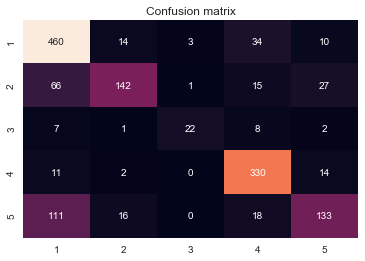

ExtraTreesClassifier
Precision:   0.84
Recall:   0.84
F1-measure:   0.84
Accuracy:   0.86
              precision    recall  f1-score   support

           1       0.85      0.89      0.87       521
           2       0.84      0.78      0.81       251
           3       0.81      0.85      0.83        40
           4       0.93      0.94      0.93       357
           5       0.79      0.76      0.77       278

   micro avg       0.86      0.86      0.86      1447
   macro avg       0.84      0.84      0.84      1447
weighted avg       0.85      0.86      0.85      1447



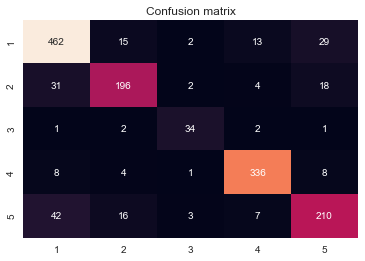

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

clf1 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', RandomForestClassifier()),
])

clf2 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', RandomForestClassifier(n_estimators=50, random_state=1)),
])

clf3 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', BaggingClassifier()),
])

clf4 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)),
])

clf5 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', ExtraTreesClassifier()),
])

X=corpus_sample_train['Shrt_Desc']
y=pd.to_numeric(corpus_sample_train["Class"])

print(type(X), type(y))

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, eclf], ['Random Forest', 'Random Forest params', 'Bagging', 'Bagging params', 'ExtraTreesClassifier']):
    clf.fit(X, y)
    print(label)
    true_ = corpus_sample_test['Class']
    true = list(true_)
    pred = clf.predict(corpus_sample_test['Shrt_Desc'])
    predictions = np.array(pred).tolist()
    
    print("Precision: {0:6.2f}".format(precision_score(true, predictions, average='macro')))
    print("Recall: {0:6.2f}".format(recall_score(true, predictions, average='macro')))
    print("F1-measure: {0:6.2f}".format(f1_score(true, predictions, average='macro')))
    print("Accuracy: {0:6.2f}".format(accuracy_score(true, predictions)))
    print(classification_report(true, predictions))
    labels = clf.classes_

    sns.heatmap(data=confusion_matrix(true, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
    plt.title("Confusion matrix")
    plt.show()


## Preprocessing without lemmatize

In [103]:
df["Class"] = pd.to_numeric(df["Class"])
data = pd.DataFrame(df, columns=['Shrt_Desc', 'Class'])


data['Class'].value_counts()

1    2609
4    1786
5    1391
2    1257
3     202
Name: Class, dtype: int64

In [104]:
data.head()

,Shrt_Desc,Class
0,"BABYFOOD,CRL,OATMEAL,W/BANANAS,DRY",5
1,"HEARTS OF PALM,CANNED",5
2,"CHICKEN,BROILERS OR FRYERS,THIGH,MEAT ONLY,CKD...",4
3,"PORK,CURED,SHLDR,ARM PICNIC,LN&FAT,RSTD",4
4,"VINEGAR,DISTILLED",2


In [105]:
corpus_sample_train = pd.DataFrame(columns=data.columns)
corpus_sample_test = pd.DataFrame(columns=data.columns)

for cl in data['Class'].unique():
    corpus_sample = data[data['Class']==cl]
    c = int(0.8*len(corpus_sample))
    corpus_sample_train = corpus_sample_train.append(corpus_sample.iloc[:c,:])
    corpus_sample_test = corpus_sample_test.append(corpus_sample.iloc[c + 1:,:])

In [106]:
len(corpus_sample_train)

5793

In [107]:
len(corpus_sample_test)

1447

In [108]:
corpus_sample_train.Shrt_Desc = corpus_sample_train.Shrt_Desc.apply(low)
corpus_sample_test.Shrt_Desc = corpus_sample_test.Shrt_Desc.apply(low)
corpus_sample_train.Shrt_Desc = corpus_sample_train.Shrt_Desc.apply(words_only)
corpus_sample_test.Shrt_Desc = corpus_sample_test.Shrt_Desc.apply(words_only)
corpus_sample_train.Shrt_Desc = corpus_sample_train.Shrt_Desc.apply(remove_stopwords)
corpus_sample_test.Shrt_Desc = corpus_sample_test.Shrt_Desc.apply(remove_stopwords)
# corpus_sample_train.Shrt_Desc = corpus_sample_train.Shrt_Desc.apply(lemmatize)
# corpus_sample_test.Shrt_Desc = corpus_sample_test.Shrt_Desc.apply(lemmatize)

print(corpus_sample_train['Class'].value_counts())
corpus_sample_test.head()


1    2087
4    1428
5    1112
2    1005
3     161
Name: Class, dtype: int64


,Shrt_Desc,Class
5791,oil industrial soy part hydr non dairy butter ...,5
5803,lamb nz imp netted rolled slow,5
5817,tofu yogurt,5
5819,tofu firm prep nigari,5
5823,onion powder,5


## VotingClassifier

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
Random Forest
Precision:   0.84
Recall:   0.84
F1-measure:   0.84
Accuracy:   0.85
              precision    recall  f1-score   support

           1       0.83      0.90      0.87       521
           2       0.87      0.75      0.81       251
           3       0.78      0.90      0.84        40
           4       0.92      0.96      0.94       357
           5       0.80      0.70      0.75       278

   micro avg       0.85      0.85      0.85      1447
   macro avg       0.84      0.84      0.84      1447
weighted avg       0.85      0.85      0.85      1447



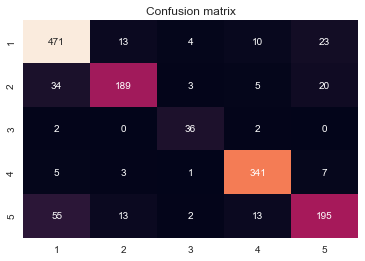

Random Forest params
Precision:   0.84
Recall:   0.85
F1-measure:   0.84
Accuracy:   0.85
              precision    recall  f1-score   support

           1       0.83      0.89      0.86       521
           2       0.88      0.76      0.82       251
           3       0.78      0.90      0.84        40
           4       0.93      0.95      0.94       357
           5       0.77      0.73      0.75       278

   micro avg       0.85      0.85      0.85      1447
   macro avg       0.84      0.85      0.84      1447
weighted avg       0.85      0.85      0.85      1447



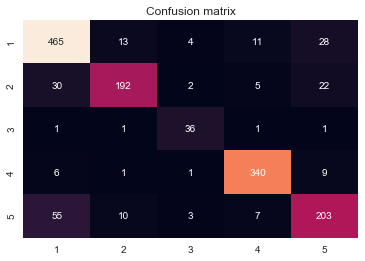

Bagging
Precision:   0.83
Recall:   0.84
F1-measure:   0.84
Accuracy:   0.85
              precision    recall  f1-score   support

           1       0.86      0.89      0.88       521
           2       0.83      0.76      0.80       251
           3       0.76      0.88      0.81        40
           4       0.94      0.95      0.94       357
           5       0.76      0.74      0.75       278

   micro avg       0.85      0.85      0.85      1447
   macro avg       0.83      0.84      0.84      1447
weighted avg       0.85      0.85      0.85      1447



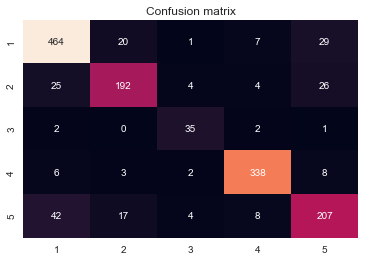

Bagging params
Precision:   0.77
Recall:   0.66
F1-measure:   0.69
Accuracy:   0.74
              precision    recall  f1-score   support

           1       0.71      0.89      0.79       521
           2       0.80      0.52      0.63       251
           3       0.85      0.55      0.67        40
           4       0.75      0.94      0.83       357
           5       0.73      0.41      0.53       278

   micro avg       0.74      0.74      0.74      1447
   macro avg       0.77      0.66      0.69      1447
weighted avg       0.74      0.74      0.72      1447



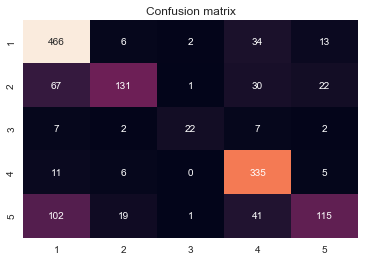

ExtraTreesClassifier
Precision:   0.85
Recall:   0.85
F1-measure:   0.85
Accuracy:   0.86
              precision    recall  f1-score   support

           1       0.86      0.90      0.88       521
           2       0.82      0.80      0.81       251
           3       0.83      0.85      0.84        40
           4       0.94      0.94      0.94       357
           5       0.80      0.74      0.77       278

   micro avg       0.86      0.86      0.86      1447
   macro avg       0.85      0.85      0.85      1447
weighted avg       0.86      0.86      0.86      1447



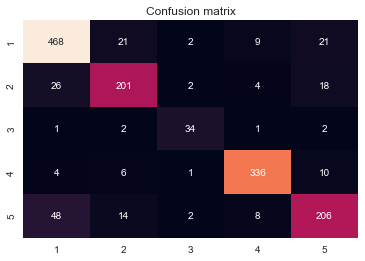

In [109]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

clf1 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', RandomForestClassifier()),
])

clf2 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', RandomForestClassifier(n_estimators=50, random_state=1)),
])

clf3 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', BaggingClassifier()),
])

clf4 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)),
])

clf5 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', ExtraTreesClassifier()),
])

X=corpus_sample_train['Shrt_Desc']
y=pd.to_numeric(corpus_sample_train["Class"])

print(type(X), type(y))

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, eclf], ['Random Forest', 'Random Forest params', 'Bagging', 'Bagging params', 'ExtraTreesClassifier']):
    clf.fit(X, y)
    print(label)
    true_ = corpus_sample_test['Class']
    true = list(true_)
    pred = clf.predict(corpus_sample_test['Shrt_Desc'])
    predictions = np.array(pred).tolist()
    
    print("Precision: {0:6.2f}".format(precision_score(true, predictions, average='macro')))
    print("Recall: {0:6.2f}".format(recall_score(true, predictions, average='macro')))
    print("F1-measure: {0:6.2f}".format(f1_score(true, predictions, average='macro')))
    print("Accuracy: {0:6.2f}".format(accuracy_score(true, predictions)))
    print(classification_report(true, predictions))
    labels = clf.classes_

    sns.heatmap(data=confusion_matrix(true, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
    plt.title("Confusion matrix")
    plt.show()


## Лучший результат

In [117]:
df["Class"] = pd.to_numeric(df["Class"])
data = pd.DataFrame(df, columns=['Shrt_Desc', 'Class'])


data['Class'].value_counts()

1    2609
4    1786
5    1391
2    1257
3     202
Name: Class, dtype: int64

In [118]:
data.head()

,Shrt_Desc,Class
0,"BABYFOOD,CRL,OATMEAL,W/BANANAS,DRY",5
1,"HEARTS OF PALM,CANNED",5
2,"CHICKEN,BROILERS OR FRYERS,THIGH,MEAT ONLY,CKD...",4
3,"PORK,CURED,SHLDR,ARM PICNIC,LN&FAT,RSTD",4
4,"VINEGAR,DISTILLED",2


In [119]:
corpus_sample_train = pd.DataFrame(columns=data.columns)
corpus_sample_test = pd.DataFrame(columns=data.columns)

for cl in data['Class'].unique():
    corpus_sample = data[data['Class']==cl]
    c = int(0.8*len(corpus_sample))
    corpus_sample_train = corpus_sample_train.append(corpus_sample.iloc[:c,:])
    corpus_sample_test = corpus_sample_test.append(corpus_sample.iloc[c + 1:,:])

In [120]:
len(corpus_sample_train)

5793

In [121]:
len(corpus_sample_test)

1447

In [122]:
corpus_sample_train.Shrt_Desc = corpus_sample_train.Shrt_Desc.apply(low)
corpus_sample_test.Shrt_Desc = corpus_sample_test.Shrt_Desc.apply(low)
corpus_sample_train.Shrt_Desc = corpus_sample_train.Shrt_Desc.apply(words_only)
corpus_sample_test.Shrt_Desc = corpus_sample_test.Shrt_Desc.apply(words_only)
corpus_sample_train.Shrt_Desc = corpus_sample_train.Shrt_Desc.apply(remove_stopwords)
corpus_sample_test.Shrt_Desc = corpus_sample_test.Shrt_Desc.apply(remove_stopwords)
# corpus_sample_train.Shrt_Desc = corpus_sample_train.Shrt_Desc.apply(lemmatize)
# corpus_sample_test.Shrt_Desc = corpus_sample_test.Shrt_Desc.apply(lemmatize)

print(corpus_sample_train['Class'].value_counts())
corpus_sample_test.head()


1    2087
4    1428
5    1112
2    1005
3     161
Name: Class, dtype: int64


,Shrt_Desc,Class
5791,oil industrial soy part hydr non dairy butter ...,5
5803,lamb nz imp netted rolled slow,5
5817,tofu yogurt,5
5819,tofu firm prep nigari,5
5823,onion powder,5


## ExtraTreesClassifier

In [123]:
from sklearn.ensemble import ExtraTreesClassifier

clf = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', ExtraTreesClassifier()),
])

X=corpus_sample_train['Shrt_Desc']
y=pd.to_numeric(corpus_sample_train["Class"])

clf.fit(X, y)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [124]:
true_ = corpus_sample_test['Class']
true = list(true_)
pred = clf.predict(corpus_sample_test['Shrt_Desc'])
predictions = np.array(pred).tolist()

Precision:   0.85
Recall:   0.85
F1-measure:   0.85
Accuracy:   0.86
              precision    recall  f1-score   support

           1       0.86      0.89      0.87       521
           2       0.83      0.80      0.82       251
           3       0.82      0.90      0.86        40
           4       0.94      0.94      0.94       357
           5       0.79      0.74      0.76       278

   micro avg       0.86      0.86      0.86      1447
   macro avg       0.85      0.85      0.85      1447
weighted avg       0.86      0.86      0.86      1447



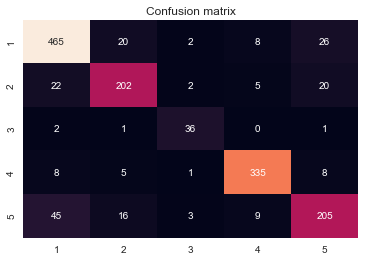

In [125]:
print("Precision: {0:6.2f}".format(precision_score(true, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(true, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(true, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(true, predictions)))
print(classification_report(true, predictions))
labels = clf.classes_

sns.heatmap(data=confusion_matrix(true, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

## Сохранение модели

In [ ]:
from joblib import dump
dump(clf, 'filename.joblib') 

## Расчет точности модели

In [5]:
lots = 7756
er6 = 511
ac = 0.86*511
print('Accuracy of classificator: ', 100-(er6-ac)*100/7756)

Accuracy of classificator:  99.07761732851985
